# Simulated Temperature Sensing Code. 

This is a script that can be used to analyse the results of the simulated temperture sensing experiments once one of the temperature sensing algorthims has been used to look at the data and save it to a text file. 

In [1]:
import numpy as np 
import pandas as pd 
import scipy.optimize as opt 
import os 
import matplotlib.pyplot as plot

In [2]:
def load_kuscko_data(file_name):
    '''Load in the data from the Kuscko tempearture sensing analysis from a 
    text file.'''
    
    data_file = pd.read_table(file_name)
    return(data_file)

In [3]:
def load_analysis_data(file_name):
    '''This method is used to call in the datasets that have been analysed using either 
    the Singam and Fujiwara data analysis methods. '''
    
    data_file = pd.ReadTable(file_name)
    return(data_file)

In [4]:
def linear_equation(x, m, c):
    '''Linear equation'''
    y = m*x + c
    return(y)

In [5]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [6]:
def get_r_squared(x, y_data, y_fitting):
    # This is a function used to generate the goodness of fit metric r^2.
    # This value will be used to judge the effectiveness of the curve fitting 
    # used to find the resonant frequencies of the NV centre.
    
    y_data_mean = np.mean(y_data)
    SStot = np.sum((y_data - y_data_mean)**2) # Find the variation in experimental y values.
    SSres = np.sum((y_data - y_fitting)**2) # Find the variation betweem the experimental and fitted y values. 
    
    r_squared = 1 - (SSres/SStot) # Calculate R^2
    
    return(r_squared)

In [8]:
# Write out the date, analysis method and folder/file path. 
date = '20210930'

# Analysis Type 
analysis_method = '_Singam_analysis_thesis_script'

folder_path = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data Analysis\\Ryans Data (2018-2021)\\ODMR\\'
file_name = date + analysis_method + '_reference_4_point_analysis.dat'
file_path = folder_path + date + '\\' + file_name

# Get data from the data file. 
data = load_kuscko_data(file_path)
measured_freq = data['Calculated change in res freq (kHz) ']
#print(data)

set_plot_params()

[1097.0168867492248, 799.4950603573695, 690.552230244155, 473.10880578001814, 568.1494606375616, 509.11303464741275, 351.5706723476111]
[-6.71380088e-01  9.64282940e+02]
[ 0.1163874  71.03666298]
166.0692120311124
r squared = 0.8240037638367679


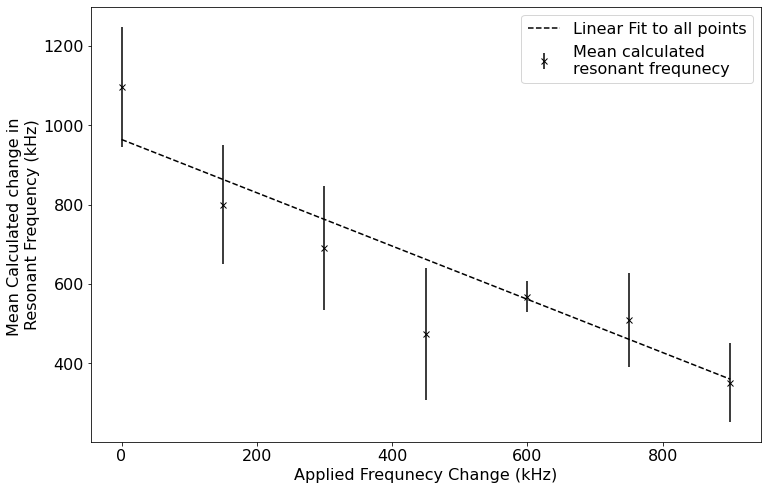

In [9]:
# Set the number of repeats per measurement. 
measurement_repeats = 5 

mean_frequency = []
std_freq_measurement = [] 

single_shot_measurement = []
single_shot_error = []

for i in range(int(len(measured_freq)/measurement_repeats)):
    mean_frequency.append(np.mean(measured_freq[(i*measurement_repeats):(i+1)*measurement_repeats]))
    std_freq_measurement.append(np.std(measured_freq[(i*measurement_repeats):(i+1)*measurement_repeats]))
    
    single_shot_measurement.append(measured_freq[i*measurement_repeats])
    single_shot_error.append(data['error Calculated change in res freq (kHz) '][i*measurement_repeats])
    
print(mean_frequency)

applied_freq_change = [0, 150, 300, 450, 600, 750, 900]
applied_freq_change = np.array(applied_freq_change)
P0 = [0,0]

fig, ax = plot.subplots()

ax.errorbar(applied_freq_change, mean_frequency, std_freq_measurement, marker = 'x', 
             linestyle = '', label = 'Mean calculated \nresonant frequnecy', color = 'k')

coeffs, confidence = opt.curve_fit(linear_equation, applied_freq_change, mean_frequency, P0, 
                                  sigma = std_freq_measurement)
error = np.sqrt(np.diag(confidence))

y2 = linear_equation(applied_freq_change, coeffs[0], coeffs[1])
#ax.plot(applied_freq_change, y, linestyle = '--', 
#         label = 'Linear Fit to first 4 points', color = 'k')

ax.plot(applied_freq_change, y2, linestyle = '--', 
         label = 'Linear Fit to all points', color = 'k')

ax.set_xlabel('Applied Frequnecy Change (kHz)')
ax.set_ylabel('Mean Calculated change in \nResonant Frequency (kHz)')

#ax.axis([-0.05, 1.55, np.min(mean_frequency)-0.5, np.max(mean_frequency)+0.5])
ax.legend()

print(coeffs)
print(error)

print(np.max(std_freq_measurement))

print('r squared = '  + str(get_r_squared(applied_freq_change, mean_frequency, y2)))

In [10]:
fig.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\' + 
           date + '\\' + date + '_Singam_mean_res_freq_shift' + '.pdf')

[-8.04543802e-01  9.81721606e+02]
[ 0.17271041 92.03458104]
Max Error = -317.79282258331665
0.8198884959815054
[ 174.88283965 -182.44389315   63.17565277 -135.26526491   34.48320886
   12.89831194   50.88597528]


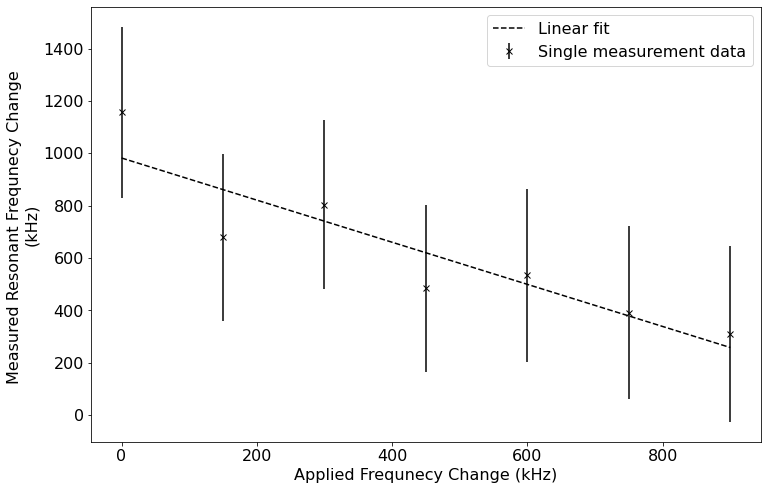

In [11]:
fig2, ax2 = plot.subplots()
ax2.errorbar(applied_freq_change, single_shot_measurement, single_shot_error, marker = 'x', linestyle = '',
             color = 'k', label = 'Single measurement data')

coeffs_2, confidence = opt.curve_fit(linear_equation, applied_freq_change, 
                                     single_shot_measurement, P0, sigma = single_shot_error)

y3 = linear_equation(applied_freq_change, coeffs_2[0], coeffs_2[1])

ax2.plot(applied_freq_change, y3, color = 'k', linestyle = '--', 
         label = 'Linear fit')
ax2.set_xlabel('Applied Frequnecy Change (kHz)')
ax2.set_ylabel('Measured Resonant Frequnecy Change \n(kHz)')
ax2.legend()

fig2.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\' + 
           date + '\\' + date + '_Singam_signle_res_freq_shift' + '.pdf')
print(coeffs_2)
print(np.sqrt(np.diag(confidence)))

print('Max Error = ' + str(np.max(single_shot_error)))

print(get_r_squared(applied_freq_change, single_shot_measurement, y3))

percent_error = (single_shot_measurement - y3)# / y3

print(percent_error)

In [12]:
get_r_squared(applied_freq_change, single_shot_measurement, y3)

0.9667443499186779

In [20]:
93/75

1.24

0.8360655737704918